# Swiss bank notes

## Description


Six variables ont été mesurées sur 200 billets de banque de mille francs Suisse, dont 100 étaient des vrais billets et 100 des faux billets. Cette étude a été extraite du livre de Flury and Riedwyl (_B. Flury and H. Riedwyl. Multivariate Statistics. Cambridge University Press, 1988. 1.1_)

X1|length|Length of the bank note
--------|------|-----
X2|height.left|Height of the bank note, measured on the left
X3|height.right|Height of the bank note, measured on the right
X4|distance.lower|Distance of inner frame to the lower border
X5|distance.upper|Distance of inner frame to the upper border
X6|diagonal|Length of the diagonal


Le fichier texte `swiss-bank-notes.csv` contient en première ligne, le nom des variables. Les 100 premières lignes de données correspondent aux vrais billets, les 100 dernières correspondent aux faux billets.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Travaux préliminaires

1. Importer les données

In [2]:
data = pd.read_csv("swiss-bank-notes.csv", sep=";", decimal=",")
data.head()

,Length,HeightLeft,HeightRight,InnerFrameLow,InnerFrameUpper,Diagonal,Type
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


2. 1. Quelle est la longueur de la digonale du 101 ème billet ?

In [14]:
data["Diagonal"][100]

np.float64(139.8)

3. Extraire la sous table des billets corespondant aux lignes 10, 30, 60 et 120.

In [26]:
data.iloc[[10, 30, 60, 120],]

,Length,HeightLeft,HeightRight,InnerFrameLow,InnerFrameUpper,Diagonal,Type
10,215.3,130.4,130.3,7.9,11.7,141.8,1
30,215.2,130.1,129.8,7.9,10.7,141.8,1
60,215.1,129.6,129.3,8.3,9.9,141.6,1
120,214.8,130.3,130.4,10.1,12.1,139.6,0


4. Extraire la sous table de la troisième à la sixième colonne.

In [22]:
data.iloc[:,2:6].head()

,HeightRight,InnerFrameLow,InnerFrameUpper,Diagonal
0,131.1,9.0,9.7,141.0
1,129.7,8.1,9.5,141.7
2,129.7,8.7,9.6,142.2
3,129.6,7.5,10.4,142.0
4,129.7,10.4,7.7,141.8


5. Extraire la sous table des billets correspondants aux lignes 25 à 30 et aux colonnes `Height.left`, `Diagonal` et `type`.

In [25]:
data.iloc[25:31,[1, 5, 6]]

,HeightLeft,Diagonal,Type
25,130.4,142.3,1
26,130.2,142.4,1
27,130.3,141.9,1
28,130.0,141.8,1
29,129.7,142.0,1
30,130.1,141.8,1


6. Tracer la variable `InnerFrameUpper` en fonction de `Diagonal` en utilisant des points de couleurs bleu pour les vrais billets et rouge pour les faux billets. La corrélation est-semble-t-elle importante ?

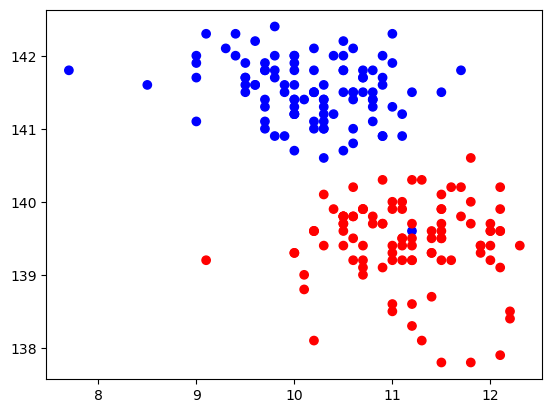

In [33]:
plt.scatter(data['InnerFrameUpper'], data['Diagonal'], c=["blue" if Type else "red" for Type in data["Type"]])

7. Est-il nécessaire de centrer et réduire les données ? Justifier.

*Il est toujours mieux de normaliser les données.*

# Classification

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import scale


Utiliser les documents du cours `kmeans-python.ipynb` et `cah-python.ipynb` pour répondre aux questions suivantes :
1. Appliquer l'algorithme des moyennes mobiles (`k-means`) à ce jeu de données. 

In [59]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scale(data.iloc[:,:6]))

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [60]:
pd.Series(kmeans.labels_).value_counts()

0    108
1     92
Name: count, dtype: int64

2. En utilisant l'inertie, quel semble être le nombre de classes le plus adéquat ? Est-ce normal ?

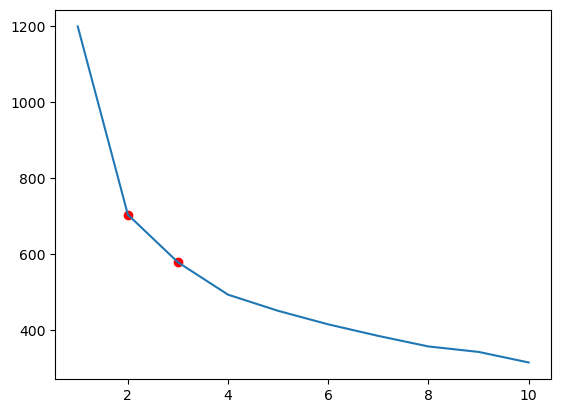

In [63]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(scale(data.iloc[:,:6]))
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
# print(inertia)
# seaborn.lineplot(data = inertia, x = "k", y = "inertia")
plt.plot(inertia["k"], inertia["inertia"])
plt.scatter(2, inertia.query('k == 2')["inertia"], c = "red")
plt.scatter(3, inertia.query('k == 3')["inertia"], c = "red")
plt.show()

*2 classes ont l'air d'apporter la meilleure amélioration. Cela correspond aux 2 types de billets (vrai / faux).*

3. Procéder à une classification ascendante hierarchique puis représenter le dendogramme. Le nombre de classes suggéré par le dendogramme est-il le même qu'avec le k-means ?

In [69]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [70]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hac.fit(scale(data.iloc[:,:6]))

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,0
,compute_distances,False


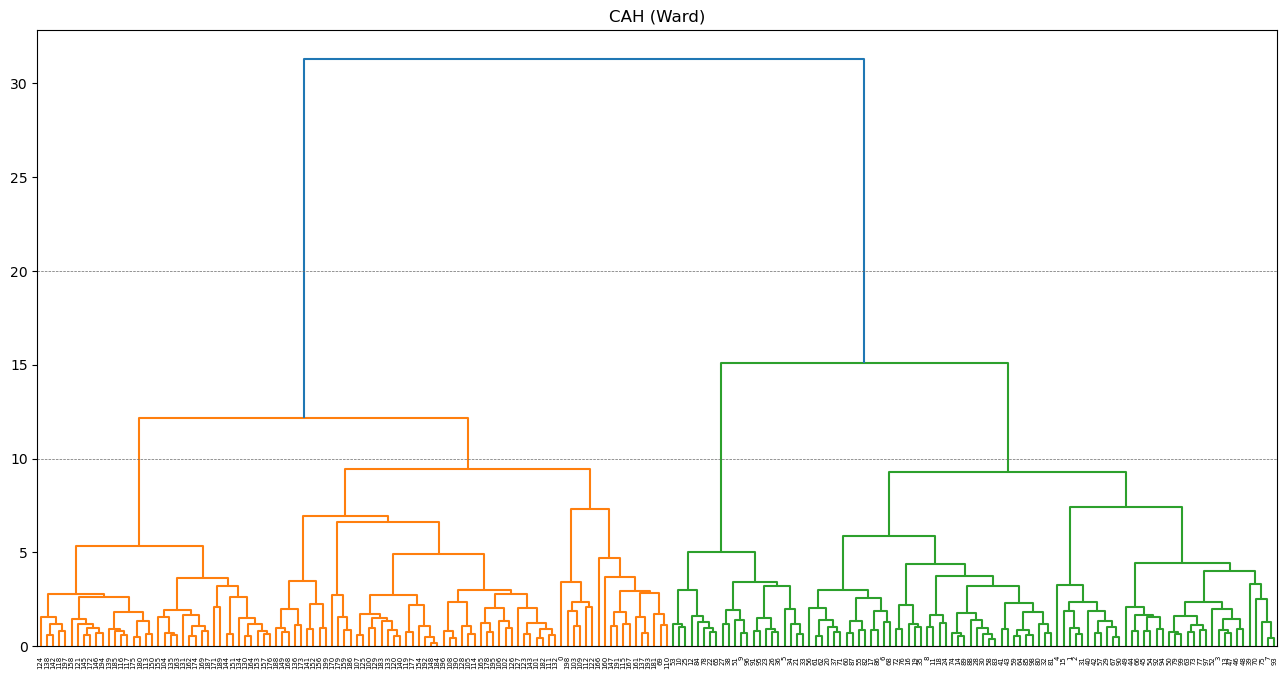

In [71]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac)
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

4. Ces deux méthodes de classification semblent-elles efficaces au vue de la nature du jeu de données ? 

*Oui.*